In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [4]:
life = np.loadtxt('../Data/B5/life_batteries.txt').reshape(1,-1)[0]
life

array([130., 145., 126., 146., 164., 130., 132., 152., 145., 129., 133.,
       155., 140., 127., 139., 137., 131., 126., 145., 148., 125., 132.,
       126., 126., 126., 135., 131., 129., 147., 136., 129., 136., 156.,
       146., 130., 146., 132., 142., 132., 132.])

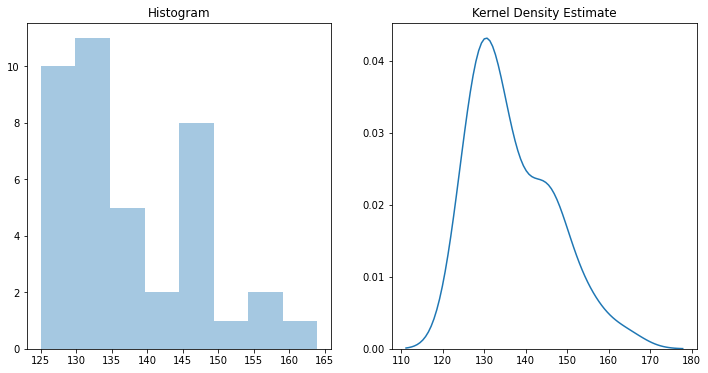

In [90]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(life, kde=False, bins=8)
plt.title('Histogram')
plt.subplot(1,2,2)
sb.distplot(life, hist=False, bins=8)
plt.title('Kernel Density Estimate')
plt.show()

In [49]:
lst = np.linspace(120, 170, num=6)
lst = list(map(int,lst))

In [50]:
freq_table = pd.DataFrame(columns=['Freq'])
for i in range(len(lst)-1):
    freq_table.loc[str(lst[i])+'-'+str(lst[i+1]-1)] = life[(life >= lst[i]) & (life < lst[i+1])].shape[0]

In [51]:
freq_table

,Freq
120-129,10
130-139,16
140-149,10
150-159,3
160-169,1


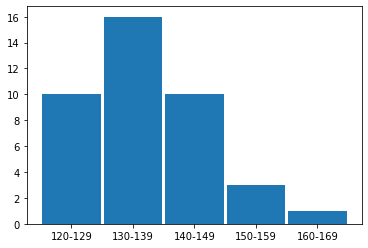

In [86]:
plt.bar(x=freq_table.index, height=freq_table['Freq'], width=0.95);

In [74]:
print('Mean: %.2f,\t Median: %.2f,\nMode: %i count: %i times,\nMax : %i,\t Min: %i,\nVariance: %.2f, Std: %.4f'
            %(np.mean(life), np.median(life), stats.mode(life)[0], stats.mode(life)[1],
                life.max(), life.min(), life.var(), life.std()))

Mean: 136.85,	 Median: 132.50,
Mode: 126 count: 5 times,
Max : 164,	 Min: 125,
Variance: 93.48, Std: 9.6684


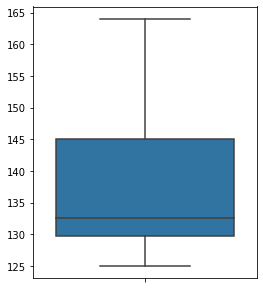

In [87]:
plt.figure(figsize=(4,5))
sb.boxplot(y=life);
# Nhận xét: Không có Outlier

In [78]:
stats.skew(life)
# Nhận xét: Skewness ratio lớn hơn 0 nên phân phối của life batteries lệch sang phải (Mode < Median < Mean) so với phân phối chuẩn

0.8455287049086152

In [80]:
stats.kurtosis(life)
# Nhận xét: Kurtosis ratio gần bằng 0 nên phân phối của life batteries có độ nhọn gần giống như độ nhọn phân phối chuẩn, thấp hơn 1 chút so với phân phối chuẩn (vì số âm)

-0.07613238307755621

In [89]:
life2 = np.loadtxt('../Data/B5/life_batteries_2.txt').reshape(1,-1)[0]
life2

array([134., 130., 140., 151., 143., 134., 136., 144., 150., 135., 160.,
       141., 143., 140., 138., 141., 148., 146., 140., 146., 151., 138.,
       151., 139., 151., 128., 146., 147., 152., 142., 144., 134., 142.,
       146., 142., 136., 122., 134., 145., 147.])

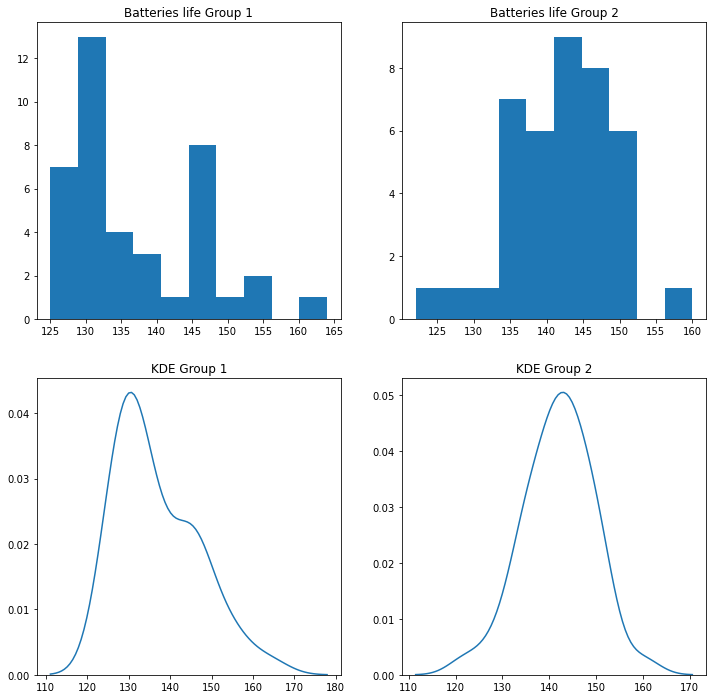

In [96]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.hist(life)
plt.title('Batteries life Group 1')
plt.subplot(2,2,2)
plt.hist(life2)
plt.title('Batteries life Group 2')

plt.subplot(2,2,3)
sb.distplot(life, hist=False)
plt.title('KDE Group 1')
plt.subplot(2,2,4)
sb.distplot(life2, hist=False)
plt.title('KDE Group 2')

plt.show()

In [99]:
# Nhận xét:
# - Dữ liệu Batteries 2 có phân phối nhiều dữ liệu nằm trong khoảng 140-145, trong khi dữ liệu Batteries 1 dữ liệu phần lớn trong khoảng 130. Qua biểu đồ cho thấy các khoảng Mean, Mode, Median Batteries 2 nằm khoảng 140, lớn hơn Batteries 1 ở 130
# - Ngoài ra mức độ biến thiên, dàn trải của Batteries 2 ít hơn so với Batteries 1
# - Từ 2 yếu tố trên, có thể phần nào kết luận sản phẩm Batteries 2 tốt hơn so với Batteries 1

In [104]:
lst2 = np.linspace(120, 170, num=6).astype(int).tolist()
lst2

[120, 130, 140, 150, 160, 170]

In [119]:
freq2_table = pd.DataFrame(columns=['Freq2'])
for i in range(len(lst2)-1):
    freq2_table.loc[str(lst2[i])+'-'+str(lst2[i+1]-1),'Freq2'] = life2[(life2 >= lst2[i]) & (life2 < lst2[i+1])].shape[0]
freq2_table

,Freq2
120-129,2
130-139,11
140-149,20
150-159,6
160-169,1


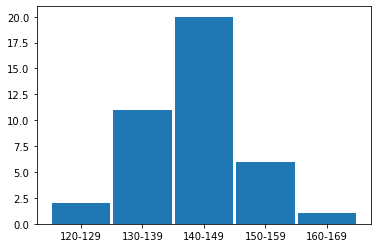

In [122]:
plt.bar(x=freq2_table.index, height=freq2_table['Freq2'], width=0.95);

In [123]:
# Nhận xét: Dựa trên 2 biểu đồ histogram và barplot frequency, có thể nhận thấy phần nhiều dữ liệu nằm trong khoảng 140-149, hình dạng phân phối khá gần với phân phối chuẩn, nên Mode, Median và Mean nằm trong khoảng 140-149 này, lớn hơn so với Batteries 1

In [124]:
stats.describe(life)

DescribeResult(nobs=40, minmax=(125.0, 164.0), mean=136.85, variance=95.87435897435898, skewness=0.8455287049086152, kurtosis=-0.07613238307755621)

In [125]:
stats.describe(life2)

DescribeResult(nobs=40, minmax=(122.0, 160.0), mean=141.925, variance=55.19935897435898, skewness=-0.2510338974166527, kurtosis=0.3567028000549164)

In [126]:
df = pd.DataFrame({'Batteries 1': life, 'Batteries 2': life2})
df.head()

,Batteries 1,Batteries 2
0,130.0,134.0
1,145.0,130.0
2,126.0,140.0
3,146.0,151.0
4,164.0,143.0


In [127]:
freq = pd.concat((freq_table,freq2_table), axis=1).rename(columns={'Freq':'Batteries 1','Freq2':'Batteries 2'})
freq

,Batteries 1,Batteries 2
120-129,10,2
130-139,16,11
140-149,10,20
150-159,3,6
160-169,1,1


In [130]:
dd = pd.melt(df, value_vars=['Batteries 1', 'Batteries 2'], var_name='batteries', value_name='value')
dd

,batteries,value
0,Batteries 1,130.0
1,Batteries 1,145.0
2,Batteries 1,126.0
3,Batteries 1,146.0
4,Batteries 1,164.0
...,...,...
75,Batteries 2,136.0
76,Batteries 2,122.0
77,Batteries 2,134.0
78,Batteries 2,145.0


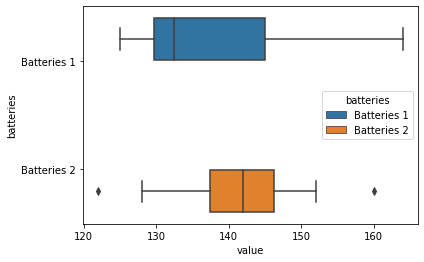

In [135]:
sb.boxplot(data=dd, x='value', y='batteries', hue='batteries');

In [136]:
# Nhận xét:
# Pin 1 không có Outlier, Pin 2 có Outliers
# Phân phối Pin 2 tập trung hơn nhiều so với Pin 1
# Pin 2 có phạm vi trung tâm lớn hơn Pin 1, mean, median, mode đều lớn hơn Pin 1